<a href="https://colab.research.google.com/github/modhudeb/Medi-Cost-Prediction-Supervised/blob/main/PreparedMedicIns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# imports

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Loading data

In [4]:
data = pd.read_csv('prepared_Insurance.csv')

In [5]:
data.head()

,age,bmi,children,charges,P_sex,P_smoker,P_region
0,19,27.900,0,16884.92400,0,1,3
1,18,33.770,1,1725.55230,1,0,2
2,28,33.000,3,4449.46200,1,0,2
3,33,22.705,0,21984.47061,1,0,1
4,32,28.880,0,3866.85520,1,0,1


# EDA

In [6]:
# data.corr()
data.corr()[['charges']]

,charges
age,0.299008
bmi,0.198341
children,0.067998
charges,1.000000
P_sex,0.057292
P_smoker,0.787251
P_region,-0.006208


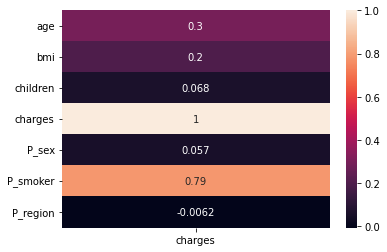

In [7]:
# sns.heatmap(data.corr()[['charges']])
sns.heatmap(data.corr()[['charges']], annot = True)

In [8]:
data.isnull().sum()

age         0
bmi         0
children    0
charges     0
P_sex       0
P_smoker    0
P_region    0
dtype: int64

# Feature selection part

In [9]:
# Seperating features and target columns
features = data.drop(columns=['charges'])
target = data.charges

In [10]:
# train test split
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(features, target, test_size = 0.3, random_state = 50)

In [11]:
# identifying important features (columns) [feature selection]
from sklearn.feature_selection import mutual_info_regression

#  eida helps us to find most significant columns for predicting through REGRESSION problem
importance_col = mutual_info_regression(xtrain, ytrain, n_neighbors=3)

In [12]:
importance_col

array([1.39000587, 0.09110515, 0.14478673, 0.12604607, 0.36274796,
       0.06880438])

In [13]:
importance_col_score = pd.DataFrame(importance_col, columns=['scores'], index= xtrain.columns)
importance_col_score.sort_values(by = 'scores', ascending=False)

,scores
age,1.390006
P_smoker,0.362748
children,0.144787
P_sex,0.126046
bmi,0.091105
P_region,0.068804


In [14]:
features.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.00,27.00000,39.0,51.00000,64.00
bmi,1338.0,30.663397,6.098187,15.96,26.29625,30.4,34.69375,53.13
children,1338.0,1.094918,1.205493,0.00,0.00000,1.0,2.00000,5.00
P_sex,1338.0,0.505232,0.500160,0.00,0.00000,1.0,1.00000,1.00
P_smoker,1338.0,0.204783,0.403694,0.00,0.00000,0.0,0.00000,1.00
P_region,1338.0,1.515695,1.104885,0.00,1.00000,2.0,2.00000,3.00


# Linear Regresssion Algorithm

In [15]:
# from above data we can see there are 3 most significant columns,
# now we will apply algorithms on top one or two significant columns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
# initializing regression model
lin_model = LinearRegression()  # eida kono parameter neyna

# .fit diya ( y = wx + b ) er w and b er man bair kora hoy. [ w holo co-efficient]
lin_model.fit(xtrain[['age', 'P_smoker','bmi']], ytrain)
# uporer part diya machine k train korlam, using TRAIN data

LinearRegression()

In [17]:
lin_model.coef_

array([  254.12053665, 23127.47249565,   295.01880536])

In [18]:
lin_model.intercept_

-10647.392898589

In [19]:
# prediction part, eita Y re predict korbo
# ekhane ami TEST data diya machine kiraham predict kortese taha test korilam botso
pred_lin_model = lin_model.predict(xtest[['age','P_smoker','bmi']])

In [20]:
# accuracy test
mse = mean_squared_error(ytest, pred_lin_model)
accuracy = r2_score(ytest, pred_lin_model)
mse, accuracy*100

(35948563.441229045, 78.08378506099888)

In [21]:
# delete these
df = pd.DataFrame(
    {
        'yTest' : ytest,
        'pred-Y': pred_lin_model
    
    })
df

,yTest,pred-Y
589,5976.83110,8063.314631
383,5846.91760,11032.940909
534,13831.11520,17558.682688
284,9625.92000,11771.461735
821,2680.94930,1172.723345
...,...,...
784,4350.51440,5862.593983
806,28476.73499,11737.107486
891,7243.81360,7068.292529
339,8232.63880,9220.073072


In [22]:
# data vizualization er khatire EKTA feature niya predict kortasi
lin_model.fit(xtrain[['age']], ytrain)  #training
ypred = lin_model.predict(xtest[['age']])

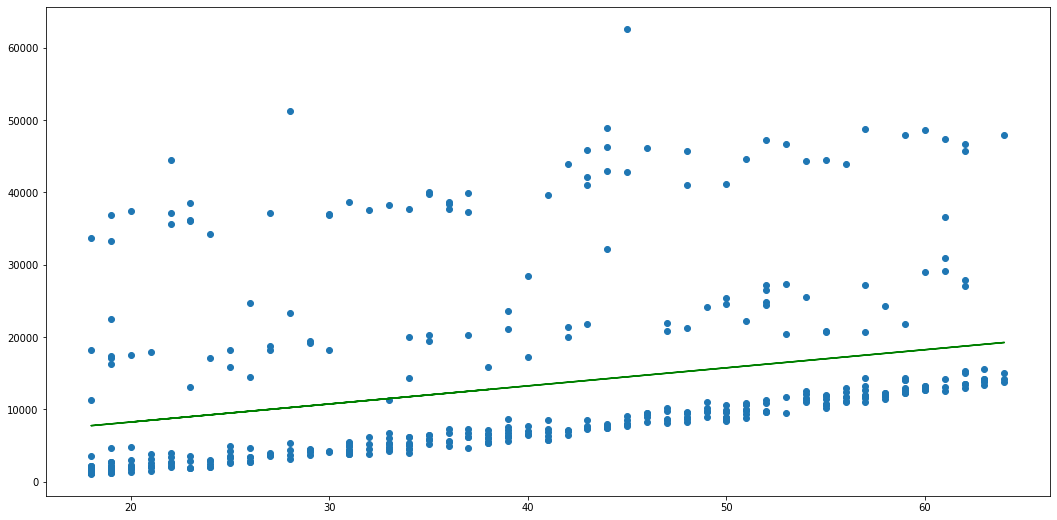

In [23]:
plt.figure(figsize=(18,9))
plt.scatter(xtest['age'], ytest)
plt.plot(xtest['age'], ypred, color = 'green')

# just sikhar purpose a uporer vizualization part ta....delete koira deis

# KNN algorithm

In [24]:
from sklearn.neighbors import KNeighborsRegressor

In [25]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(xtrain[['age', 'P_smoker']], ytrain)    # training

KNeighborsRegressor()

In [26]:
ypred = knn.predict(xtest[['age', 'P_smoker']]) # predicting

In [68]:
# checking accuracy
mse = mean_squared_error(ytest,ypred)
accuracy = r2_score(ytest, ypred)
print("Mse = ",format(mse, '.2f'), "\nAccuracy = ",accuracy*100)

Mse =  32341699.36 
Accuracy =  80.28272713021927


# Decision tree algorithm

In [28]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [29]:
# dtr = DecisionTreeRegressor()
dtr = DecisionTreeRegressor(
    min_samples_split= 15,
    min_samples_leaf=10,
    max_depth= 10
)

dtr.fit(xtrain[['age', 'P_smoker']], ytrain)  #training

DecisionTreeRegressor(max_depth=10, min_samples_leaf=10, min_samples_split=15)

In [30]:
ypred = dtr.predict(xtest[['age','P_smoker']])  # prediciting

In [69]:
# checking accuracy
mse = mean_squared_error(ytest,ypred)
accuracy = r2_score(ytest, ypred)
print("Mse = ",format(mse, '.2f'), "\nAccuracy = ",accuracy*100)

Mse =  32341699.36 
Accuracy =  80.28272713021927


[Text(0.5, 0.875, 'X[1] <= 0.5\nsquared_error = 138751781.8\nsamples = 936\nvalue = 12979.537'),
 Text(0.25, 0.625, 'X[0] <= 42.5\nsquared_error = 35263384.255\nsamples = 745\nvalue = 8343.86'),
 Text(0.125, 0.375, 'X[0] <= 32.5\nsquared_error = 22405803.307\nsamples = 421\nvalue = 5422.3'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'X[0] <= 51.5\nsquared_error = 26468081.744\nsamples = 324\nvalue = 12140.085'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'X[0] <= 49.5\nsquared_error = 131647225.718\nsamples = 191\nvalue = 31061.107'),
 Text(0.625, 0.375, 'X[0] <= 36.5\nsquared_error = 109387473.196\nsamples = 145\nvalue = 28649.503'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'X[0] <= 59.5\nsquared_error = 125694010.809\nsamples = 46\nvalue = 38662.903'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (..

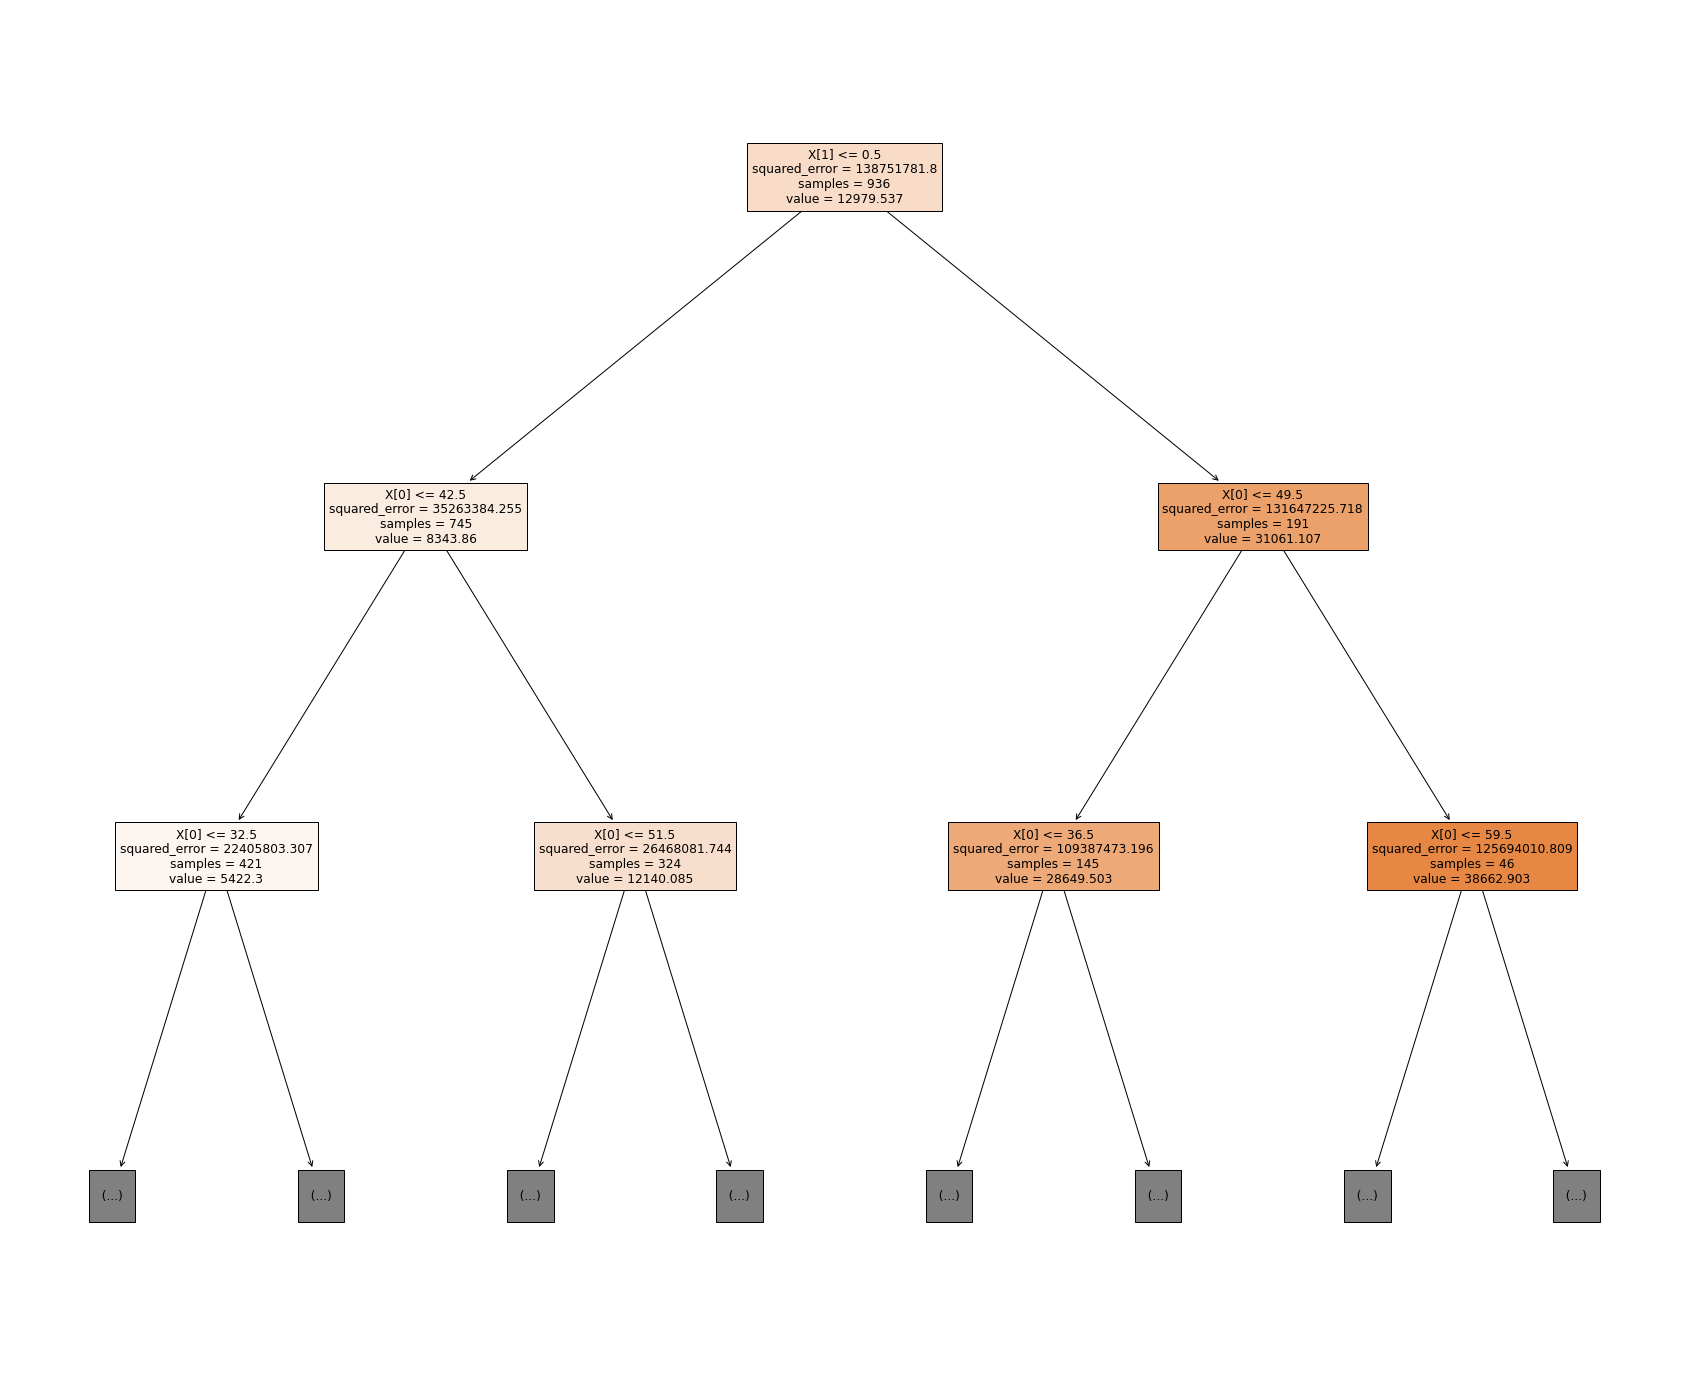

In [32]:
# Vizualizing Tree
plt.figure(figsize = (30,25))
# plot_tree(dtr, filled = True)
plot_tree(dtr, max_depth= 2, filled = True)

# Random Forest Algorithm

In [33]:
from sklearn.ensemble import RandomForestRegressor

In [34]:
# rf = RandomForestRegressor()
rf = RandomForestRegressor(
    n_estimators=400,
    min_samples_split=70,
    min_samples_leaf=50,
    max_depth= 20,
    random_state=42
    )
rf.fit(xtrain[['age','P_smoker','bmi']], ytrain)      # training
ypred_rf = rf.predict(xtest[['age','P_smoker','bmi']])   # prediction

In [70]:
# checking accuracy
mse = mean_squared_error(ytest,ypred_rf)
accuracy = r2_score(ytest, ypred_rf)
print("Mse = ",format(mse, '.2f'), "\nAccuracy = ",accuracy*100)

Mse =  21580934.15 
Accuracy =  86.84307949387889


# Support Vector Algorthm

In [36]:
from sklearn.svm import SVR

In [37]:
vectModel = SVR(
    kernel ='linear',
    degree = 7
)
vectModel.fit(xtrain[['age', 'P_smoker']], ytrain)

SVR(degree=7, kernel='linear')

In [38]:
ypred = vectModel.predict(xtest[['age', 'P_smoker']])

In [71]:
# checking accuracy
mse = mean_squared_error(ytest,ypred)
accuracy = r2_score(ytest, ypred)
print("Mse = ",format(mse, '.2f'), "\nAccuracy = ",accuracy*100)

Mse =  32341699.36 
Accuracy =  80.28272713021927


In [40]:
features.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.00,27.00000,39.0,51.00000,64.00
bmi,1338.0,30.663397,6.098187,15.96,26.29625,30.4,34.69375,53.13
children,1338.0,1.094918,1.205493,0.00,0.00000,1.0,2.00000,5.00
P_sex,1338.0,0.505232,0.500160,0.00,0.00000,1.0,1.00000,1.00
P_smoker,1338.0,0.204783,0.403694,0.00,0.00000,0.0,0.00000,1.00
P_region,1338.0,1.515695,1.104885,0.00,1.00000,2.0,2.00000,3.00


# Random forest Vizualizing

In [41]:
# dummy features for plotting
# xtest.describe().T      ## to check range of 'age' column
a = np.random.randint(18,65,402)            # dummy variable of xtest['age']  -> x axis
b = np.round(np.random.random(402))     # dummy variable of xtest['P_smoker']  -> y axis for 3D plot
_c = np.random.uniform(15.90,54.5, 402)
c = np.array(list(map((lambda x : round(x,2)), _c)))    # dummy variable of xtest['bmi']

In [72]:
#  now we can't just predict the value applying RandForest...karon predict korar jonno
# predict() er vitor just ekta X er value deya jabe.
# uporeu protibar ekta X er value e disi predict er vitor,, but oi x er value ta te
# columns chilo concatenated hisabe.
# ekhane amamder dummy x,y column gula alada ache,, so ebar ederr o concat kora lagbe to predict 'Charges'

dummy_xtest = np.c_[a,b,c]  # ekhane 'c_' means concatenation
z_pred  = rf.predict(dummy_xtest)

r2_score(ytest, z_pred)*100, mean_squared_error(ytest, z_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


(-180.91736117042362, 460781006.5690974)

In [43]:
# delete these
df = pd.DataFrame(
    {
        'a' : a,
        'b' : b,
        'c' : c,
        'pred-Y': z_pred
    
    })
df

,a,b,c,pred-Y
0,36,1.0,31.32,41541.691209
1,33,0.0,47.86,6386.001294
2,64,1.0,36.69,41541.691209
3,26,1.0,22.80,21526.974746
4,54,1.0,18.45,21526.974746
...,...,...,...,...
397,32,0.0,53.09,5492.461459
398,37,0.0,25.54,7350.142008
399,47,0.0,40.77,10231.914857
400,56,0.0,35.97,13002.602119


In [44]:
# eidao delete
data[['age', 'P_smoker','bmi', 'charges']]

,age,P_smoker,bmi,charges
0,19,1,27.900,16884.92400
1,18,0,33.770,1725.55230
2,28,0,33.000,4449.46200
3,33,0,22.705,21984.47061
4,32,0,28.880,3866.85520
...,...,...,...,...
1333,50,0,30.970,10600.54830
1334,18,0,31.920,2205.98080
1335,18,0,36.850,1629.83350
1336,21,0,25.800,2007.94500


In [45]:
# ytest.count()
# x.size
# y.size

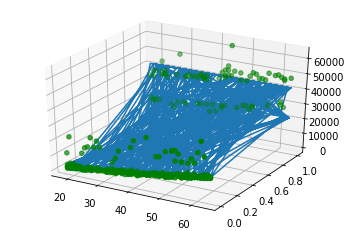

In [46]:
axs = plt.axes(projection = '3d')
axs.scatter3D(xtest['age'], xtest['P_smoker'], ytest, label = 'Baal', color = 'green')
axs.plot3D(a,b, z_pred)

# K fold cross validation

In [47]:
from sklearn.model_selection import KFold, cross_val_score

In [48]:
# KFold?

In [49]:
folds = KFold(n_splits=8, shuffle = True, random_state = 42)
accRate = []
bal = folds.split(features) # ei KFold().split(dataSet) ta 2 da array return korbo, ekta holo train index number arekta test index nummber
for xtrn_ind, xtst_ind in bal :
  xtrn = features[['age','P_smoker','bmi']].iloc[xtrn_ind]
  xtst = features[['age','P_smoker','bmi']].iloc[xtst_ind]
  ytrn = target.iloc[xtrn_ind]
  ytst = target.iloc[xtst_ind]

  rf.fit(xtrn, ytrn)
  prd = rf.predict(xtst)
  accr = r2_score(ytst, prd)
  accRate.append(accr)



In [50]:
r2Accuracy = list(map((lambda n : n*100) , accRate))
np.array(r2Accuracy).mean()

83.38503608613257

In [51]:
# Uporer sobgula kaz manually na koira ekline a kora jay
# using cross_val_score
# cross_val_score?
cvScore = cross_val_score(
    estimator= rf,
    X = features[['age','P_smoker','bmi']],
    y = target,
    cv = 10,
    scoring = 'r2'
)

In [52]:
cvScore.mean()*100

83.6426238328648

# Randomized Grid Search

In [53]:
from sklearn.model_selection import RandomizedSearchCV 

In [54]:
# RandomForestRegressor().get_params()

In [55]:
# Hyper-parameter tuning
params = {
  'bootstrap': [True,False],
  'criterion': ['squared_error','absolute_error'],
  'max_depth': np.arange(10,25,2),
  'max_features': ['sqrt','log2'],
  'min_samples_split': np.arange(50,71,3),
  'min_samples_leaf': np.arange(30,49,3),
  'n_estimators': [100,200,300,400],
}
rf2 = RandomForestRegressor()

rcv = RandomizedSearchCV(rf2, param_distributions= params, scoring = 'r2', cv = 10, n_jobs= -1, verbose = 1, random_state=42)

rcv.fit(xtrain[['age','P_smoker','bmi']], ytrain)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': array([10, 12, 14, 16, 18, 20, 22, 24]),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': array([30, 33, 36, 39, 42, 45, 48]),
                                        'min_samples_split': array([50, 53, 56, 59, 62, 65, 68]),
                                        'n_estimators': [100, 200, 300, 400]},
                   random_state=42, scoring='r2', verbose=1)

In [56]:
# print(rcv.best_params_)    # eidar memans Random forest a ei params gula dile best result pawa jabe..
                    # random forest paitesi karon, rcv er vitor rf2 mane randomforest er object disi
# rf3 = rcv.best_estimator_
rf3 = RandomForestRegressor(bootstrap=False, max_depth=14, max_features='log2',
                      min_samples_leaf=30, min_samples_split=62,
                      n_estimators=300, random_state= 42)
rf3.fit(xtrain[['age','P_smoker','bmi']], ytrain)

RandomForestRegressor(bootstrap=False, max_depth=14, max_features='log2',
                      min_samples_leaf=30, min_samples_split=62,
                      n_estimators=300, random_state=42)

In [57]:
ypred = rf3.predict(xtest[['age','P_smoker','bmi']])


# checking baal chira tero taka kamano
mse = mean_squared_error(ytest,ypred)
accuracy = r2_score(ytest, ypred)
print("Mse = ",format(mse, '.2f'), "\nAccuracy = ",accuracy*100)

Mse =  32341699.36 
Accuracy =  80.28272713021927


# Pipeline kora

In [58]:
from sklearn.pipeline import Pipeline

In [59]:
# delete
rand_f = RandomForestRegressor()
rand_f.fit(features[['age','P_smoker','bmi']], target)

RandomForestRegressor()

In [60]:
# delete
pl = Pipeline([('B_model', rand_f)])

In [61]:
# delete
pl.score(xtest[['age','P_smoker','bmi']], ytest)

0.9750473116092658

# PIPELINE

In [62]:
# creating pipeline
ppline = Pipeline([('Best_Model',rf)])

In [63]:
ppline.fit(features[['age','P_smoker','bmi']], target)    # training pipeline

Pipeline(steps=[('Best_Model',
                 RandomForestRegressor(max_depth=20, min_samples_leaf=50,
                                       min_samples_split=70, n_estimators=400,
                                       random_state=42))])

In [64]:
ppline.score(xtest[['age','P_smoker','bmi']], ytest)    # testing pipeline

0.8737507539996585

In [65]:
# saving pipeline

from joblib import dump,load

dump(ppline,'MedicalPredict_pipline')

['MedicalPredict_pipline']

In [66]:
ppl = load('MedicalPredict_pipline')

In [67]:
ppl.score(xtest[['age','P_smoker','bmi']],ytest)

0.8737507539996585